# Project: Movie Ratings Data Analysis

This data set contains information about 10,000 movies collected from The Movie Database (TMDb). The database contains very interesting information that can be used to determine the relationships between the properties of a movie and it's profitability or revenue as the case may be.

How does the runtime of a movie, and other properties affects profitability of that movie?
Which genre of movies are popular over the years? Does rating affect profits generated by a movie?
These are some of the few questions that would be addressed during the data analysis process of this dataset.

There are twenty-one (21) columns in this dataset as listed below;
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date          10866 non-null  object 
 16  vote_count            10866 non-null  int64  
 17  vote_average          10866 non-null  float64
 18  release_year          10866 non-null  int64  
 19  budget_adj            10866 non-null  float64
 20  revenue_adj

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

There are certain columns that are not needed in our analysis, such as release date (release year is sufficient), homepage column, tagline, keywords, homepage, overview. so we go ahead and drop these columns.

In [6]:
label = ['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','production_companies','release_date',]
df.drop(label, axis= 1, inplace= True)
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


check for missing data in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


Create another column for profit made on each movie by subtracting the adjusted budget from adjusted revenue.

In [8]:
df['profit_millions_adj'] = (df['revenue_adj'] - df['budget_adj'])/1000000
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_millions_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1254.445953
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,210.161353
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,170.419070
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1718.723211
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1210.948878


Since we have profit for each movie, we can proceed to remove the budget and revenue columns.

In [9]:
df.drop(['budget', 'revenue', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [10]:
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,profit_millions_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1254.445953
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,210.161353
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,170.419070
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1718.723211
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1210.948878


In [11]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,profit_millions_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,33.813323
std,1.000185,31.381405,575.619058,0.935142,12.812941,125.215073
min,0.000065,0.000000,10.000000,1.500000,1960.000000,-413.912431
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,12.926173
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,2750.136651


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   popularity           10866 non-null  float64
 1   original_title       10866 non-null  object 
 2   runtime              10866 non-null  int64  
 3   genres               10843 non-null  object 
 4   vote_count           10866 non-null  int64  
 5   vote_average         10866 non-null  float64
 6   release_year         10866 non-null  int64  
 7   profit_millions_adj  10866 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 679.2+ KB


Check for duplicated data.

In [13]:
sum(df.duplicated())

1

In [14]:
df.drop_duplicates()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,profit_millions_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1254.445953
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,210.161353
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,170.419070
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1718.723211
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1210.948878
...,...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,95,Documentary,11,7.4,1966,0.000000
10862,0.065543,Grand Prix,176,Action|Adventure|Drama,20,5.7,1966,0.000000
10863,0.065141,Beregis Avtomobilya,94,Mystery|Comedy,11,6.5,1966,0.000000
10864,0.064317,"What's Up, Tiger Lily?",80,Action|Comedy,22,5.4,1966,0.000000


In [15]:
df.dtypes

popularity             float64
original_title          object
runtime                  int64
genres                  object
vote_count               int64
vote_average           float64
release_year             int64
profit_millions_adj    float64
dtype: object

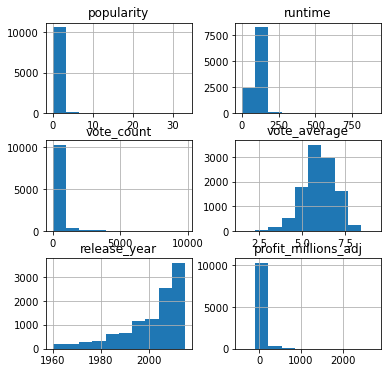

In [16]:
df.hist(figsize= (6,6));

### What is the relationship between popularity and profitability?

In [17]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,profit_millions_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,33.813323
std,1.000185,31.381405,575.619058,0.935142,12.812941,125.215073
min,0.000065,0.000000,10.000000,1.500000,1960.000000,-413.912431
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,12.926173
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,2750.136651


In [18]:
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,profit_millions_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1254.445953
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,210.161353
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,170.419070
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1718.723211
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1210.948878


In [19]:
profitable = df.profit_millions_adj > 0
not_profitable = df.profit_millions_adj < 0
df.popularity[profitable].mean()

1.1670554503047947

In [20]:
df.popularity[not_profitable].mean()

0.5034469028475721

In [21]:
#defining a function for reuse to plot other graphs
def labeling(x, y, t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show();

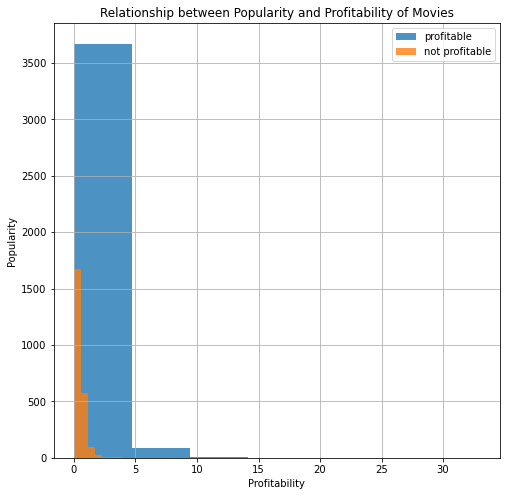

In [22]:
df.popularity[profitable].hist(figsize= (8,8), alpha= 0.8, label= 'profitable', bins= 7)
df.popularity[not_profitable].hist(figsize= (8,8), alpha= 0.8, label= 'not profitable', bins= 7)
plt.legend()
labeling('Profitability', 'Popularity', 'Relationship between Popularity and Profitability of Movies')

The average popularity for profitable movies is 1.1671.
The average popularity for not profitable movies is 0.5034.
This clearly shows that popular movies tend to make more money than less popular movies.

### How does runtime affect Profitability?

In [23]:
avg_runtime_profit = df.runtime[profitable].mean()
print(avg_runtime_profit)

108.31354359925788


In [24]:
avg_runtime_not_profit = df.runtime[not_profitable].mean()
print(avg_runtime_not_profit)

103.49162479061977


Average runtime for profitable movies is 108.3135
Average runtime for not profitable movies is 103.4916

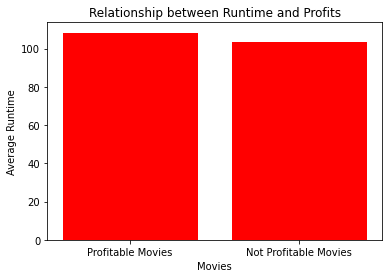

In [25]:
x = [1, 2]
y = [avg_runtime_profit, avg_runtime_not_profit]
plt.bar(x,y, tick_label= ['Profitable Movies', 'Not Profitable Movies'], color='red')
labeling('Movies', 'Average Runtime', 'Relationship between Runtime and Profits')

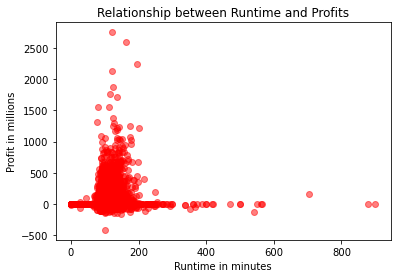

In [26]:
plt.scatter(df['runtime'], df['profit_millions_adj'], alpha= 0.50, color='red')
labeling('Runtime in minutes', 'Profit in millions', 'Relationship between Runtime and Profits')

The above bar chart and scatter plot shows that movies that are profitable have a slightly longer runtime on average than movies that are not profitable.

## Which decade was the most profit made?

I separated the six decades in the dataset to distinct groups;
sixities, seventies, eighties, nineties, millenials(2001 - 2010), genZ(2010 - end)

In [27]:
bins =[1960, 1970, 1980, 1990, 2000, 2010, 2020]
label = ['sixties', 'seventies', 'eighties', 'nineties', 'millenials','genZ']
df['decade'] = pd.cut(df.release_year, bins, labels=label)
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,profit_millions_adj,decade
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1254.445953,genZ
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,210.161353,genZ
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,170.419070,genZ
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1718.723211,genZ
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1210.948878,genZ


In [28]:
df_decade = df.groupby('decade').mean()
print(df_decade)

            popularity     runtime  vote_count  vote_average  release_year  \
decade                                                                       
sixties       0.412130  111.552561   67.636119      6.258221   1965.652291   
seventies     0.496937  107.436697  118.089908      6.333945   1975.875229   
eighties      0.527672  104.265891  126.615936      6.063653   1986.054611   
nineties      0.617926  106.341398  183.252151      5.985376   1995.955914   
millenials    0.638565  101.472418  226.352157      5.932444   2006.233725   
genZ          0.771677   97.313864  295.939666      5.888896   2013.093068   

            profit_millions_adj  
decade                           
sixties               48.765864  
seventies             70.678522  
eighties              43.958465  
nineties              38.403659  
millenials            29.370648  
genZ                  24.718232  


Grouping the dataset by decade and getting the mean for each decades enables us to get the most profitable decade for movies.

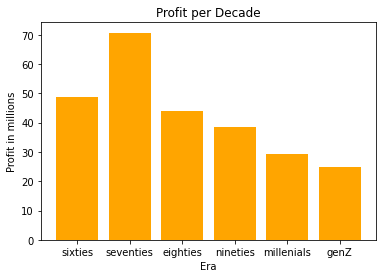

In [29]:
x = [1,2,3,4,5,6]
y = df_decade['profit_millions_adj']
ticks = ['sixties', 'seventies', 'eighties', 'nineties', 'millenials', 'genZ']
plt.bar(x,y, tick_label= ticks, label= 'Profit', color='orange')
labeling('Era', 'Profit in millions', 'Profit per Decade')

The seventies were a very successful period for movies as seen above. The most profits were made between 1971 and 1980.

## Relationship between Rating(Average Votes) and Profits

Generate the vote_average column to create the rating column by using pandas.cut function to categorise the average votes into five reting groups.

In [30]:
df.vote_average.describe()

count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [31]:
#minimum is 1.5, while maximum is 9.2
bins = [0,2,4,6,8,10]
label = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']
df['rating'] = pd.cut(df.vote_average, bins, labels= label)

In [32]:
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,profit_millions_adj,decade,rating
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1254.445953,genZ,4 stars
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,210.161353,genZ,4 stars
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,170.419070,genZ,4 stars
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1718.723211,genZ,4 stars
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1210.948878,genZ,4 stars


In [33]:
df_rating = df.groupby('rating').mean()
print(df_rating)

         popularity     runtime  vote_count  vote_average  release_year  \
rating                                                                    
1 star     0.078773   78.333333   12.666667      1.666667   1995.000000   
2 stars    0.310223   91.564815   27.453704      3.520679   2006.228395   
3 stars    0.496191   98.479135  109.315658      5.368587   2002.442190   
4 stars    0.811561  105.950200  330.669074      6.706425   1999.882342   
5 stars    1.143569  135.944444  787.203704      8.329630   2004.259259   

         profit_millions_adj  
rating                        
1 star             -0.042547  
2 stars            -2.336754  
3 stars            14.166414  
4 stars            55.166557  
5 stars            72.892705  


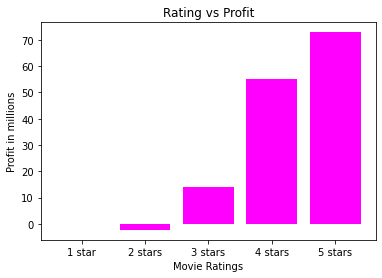

In [34]:
y = df_rating.profit_millions_adj
x = [1,2,3,4,5]
x_label = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars']
plt.bar(x,y,tick_label= x_label, label= 'Profit', color= 'magenta')
labeling('Movie Ratings', 'Profit in millions', 'Rating vs Profit')

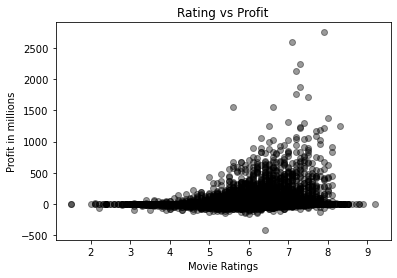

In [35]:
plt.scatter(df['vote_average'], df['profit_millions_adj'], alpha = 0.4, color='black')
labeling('Movie Ratings', 'Profit in millions', 'Rating vs Profit')

Averagely, movies rated 1 star don't make profits, while the highest rated movies make the highest amount of profits.

C:\Users\oluwo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


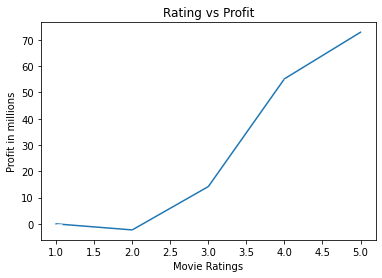

In [36]:
sns.lineplot(x, y, data= df_rating, marker= True)
labeling('Movie Ratings', 'Profit in millions', 'Rating vs Profit')

This line plot gives extra information showing that some lower rated movie fall within the loss category, meaning budget for the movie was greater than revenue.

# Conclusion

With profit generated from each movie as a dependent variable,analysis of the other independent variables shows the following;
Movies that make profit tend to have longer runtime, higher rating, more popular than the movies that do not make profit.
Another fact that can be noted from the analysis is that older movies in terms of year made are more successful (in terms of profit) than newer movies.

Which genres are most successful in terms of profit can also be analyzed. This analysis does not cover that due to the fact that a single movie can belong to multiple genres as represented in the dataset.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

120